<a href="https://colab.research.google.com/github/ipseekamalla1/garbage-classifier/blob/main/ineception_calssifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Error: The file /content/drive/MyDrive/content/dataset_garbage.zip was not found.
Missing category folder: /content/drive/MyDrive/content/garbage_dataset/garbage_dataset/cardboard
Missing category folder: /content/drive/MyDrive/content/garbage_dataset/garbage_dataset/glass
Missing category folder: /content/drive/MyDrive/content/garbage_dataset/garbage_dataset/metal
Missing category folder: /content/drive/MyDrive/content/garbage_dataset/garbage_dataset/paper
Missing category folder: /content/drive/MyDrive/content/garbage_dataset/garbage_dataset/plastic
Missing category folder: /content/drive/MyDrive/content/garbage_dataset/garbage_dataset/trash


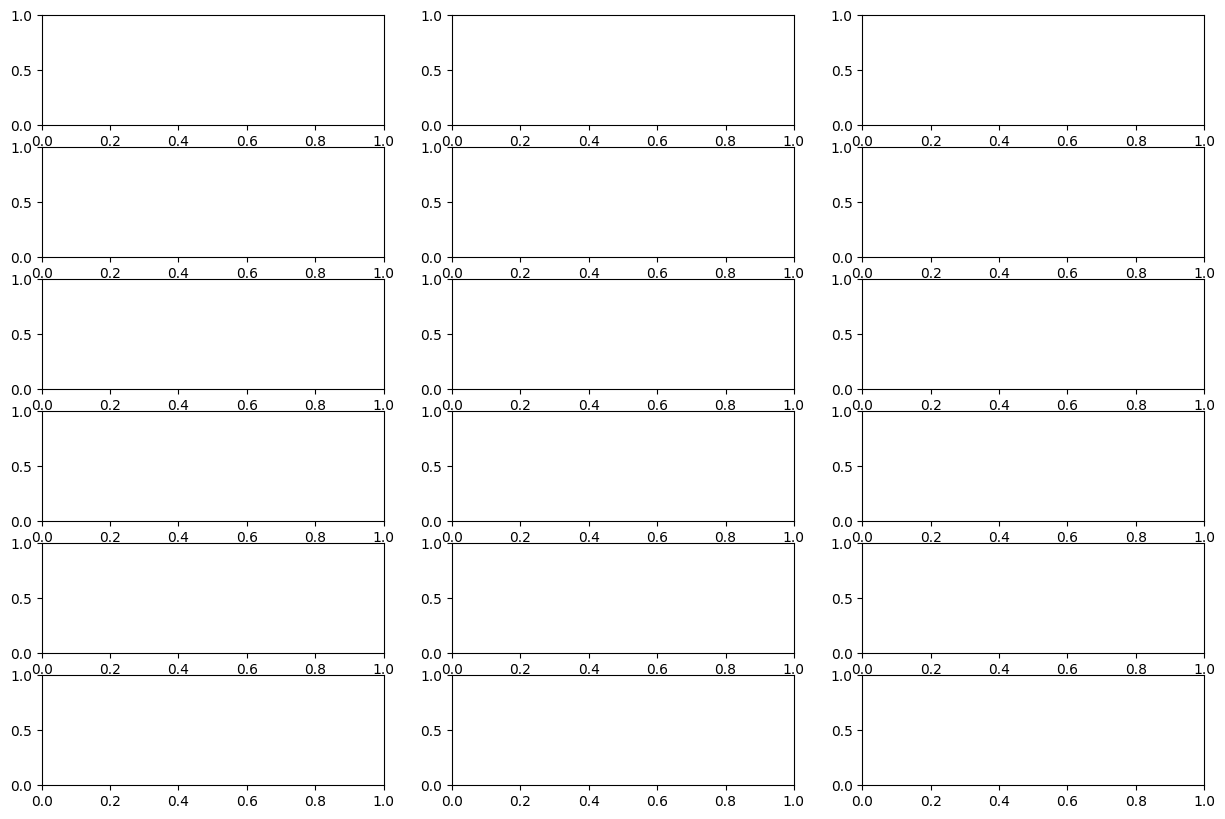

In [ ]:
from google.colab import drive
import os
import zipfile
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Mount Google Drive
drive.mount('/content/drive')

# Path to the zip file in Google Drive
zip_file = '/content/drive/MyDrive/content/dataset_garbage.zip'

# Directory to extract the dataset
extract_to = '/content/drive/MyDrive/content/garbage_dataset'

# Ensure the directory exists
os.makedirs(extract_to, exist_ok=True)

# Unzip the file
try:
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
        print(f"Dataset successfully extracted to {extract_to}")
except FileNotFoundError:
    print(f"Error: The file {zip_file} was not found.")
except zipfile.BadZipFile:
    print(f"Error: The file {zip_file} is not a valid zip file.")

# Define the path to the dataset
dataset_path = os.path.join(extract_to, 'garbage_dataset')

# Define the categories
categories = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]

# Define the number of images to display from each category
num_images_to_display = 3

# Set up the plot
fig, axes = plt.subplots(len(categories), num_images_to_display, figsize=(15, 10))

# Loop through each category
for i, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)

    # Ensure the category folder exists
    if not os.path.exists(category_path):
        print(f"Missing category folder: {category_path}")
        continue  #




Dataset successfully extracted to /content/garbage_dataset


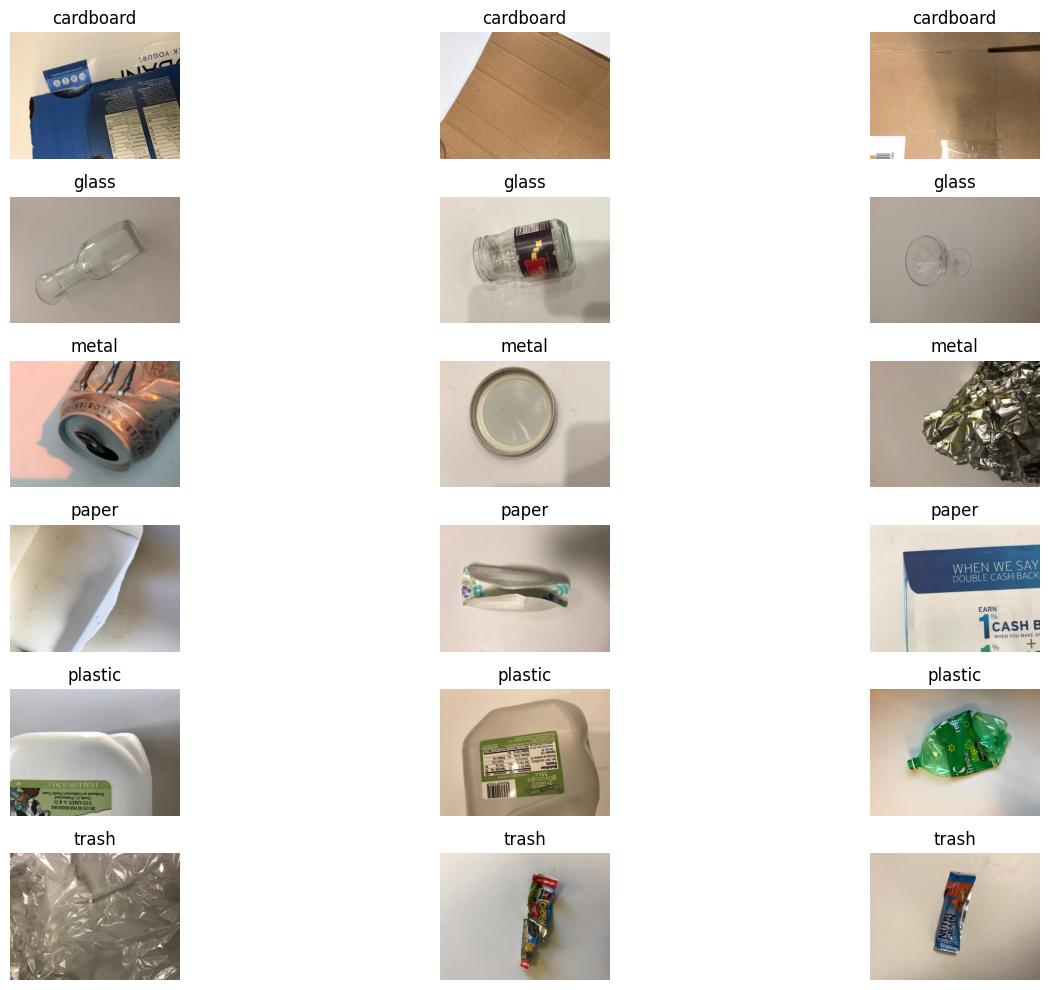

In [ ]:
import os
import zipfile
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the zip file
zip_file = '/content/garbage_dataset.zip'

# Directory to extract the dataset
extract_to = '/content/garbage_dataset'

# Ensure the directory exists
os.makedirs(extract_to, exist_ok=True)

# Unzip the file
try:
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
        print(f"Dataset successfully extracted to {extract_to}")
except FileNotFoundError:
    print(f"Error: The file {zip_file} was not found.")
except zipfile.BadZipFile:
    print(f"Error: The file {zip_file} is not a valid zip file.")

# Define the path to the dataset
dataset_path = '/content/garbage_dataset/garbage_dataset'

# Define the categories
categories = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]

# Define the number of images to display from each category
num_images_to_display = 3

# Set up the plot
fig, axes = plt.subplots(len(categories), num_images_to_display, figsize=(15, 10))

# Loop through each category
for i, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)

    # Ensure the category folder exists
    if not os.path.exists(category_path):
        print(f"Missing category folder: {category_path}")
        continue  # Skip this category if the folder does not exist

    image_files = os.listdir(category_path)

    # Ensure there are images in the category folder
    if len(image_files) == 0:
        print(f"No images found in {category_path}")
        continue

    random.shuffle(image_files)  # Shuffle the list of image files

    # Display randomly selected images
    for j in range(min(num_images_to_display, len(image_files))):  # Handle less than expected images
        img_file = image_files[j]
        img_path = os.path.join(category_path, img_file)
        img = mpimg.imread(img_path)
        axes[i, j].imshow(img)
        axes[i, j].set_title(category)
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the path to the dataset
dataset_path = "/content/garbage_dataset/garbage_dataset"

# Define the categories
categories = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]

# Define the ratio of images to be allocated for the test set
test_size = 0.5

# Create directories for the training and test sets
train_dir = "train_dataset"
test_dir = "test_dataset"

# Create train and test directories if they don't exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)

if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Loop through each category
for category in categories:
    category_path = os.path.join(dataset_path, category)
    image_files = os.listdir(category_path)

    # Split the image files into training and test sets
    train_images, test_images = train_test_split(image_files, test_size=test_size, random_state=42)

    # Create category subfolders in train and test directories if they don't exist
    train_category_dir = os.path.join(train_dir, category)
    test_category_dir = os.path.join(test_dir, category)

    if not os.path.exists(train_category_dir):
        os.makedirs(train_category_dir)

    if not os.path.exists(test_category_dir):
        os.makedirs(test_category_dir)

    # Copy training images to the corresponding category subfolder in train dataset
    for img_file in train_images:
        src_path = os.path.join(category_path, img_file)
        dest_path = os.path.join(train_category_dir, img_file)
        shutil.copy(src_path, dest_path)

    # Copy test images to the corresponding category subfolder in test dataset
    for img_file in test_images:
        src_path = os.path.join(category_path, img_file)
        dest_path = os.path.join(test_category_dir, img_file)
        shutil.copy(src_path, dest_path)

print("Dataset split into training and test sets successfully.")


Dataset split into training and test sets successfully.


In [ ]:
import os
import shutil

def sort_images_into_folders(dataset_dir):
    # Iterate through the images in the dataset directory
    for filename in os.listdir(dataset_dir):
        file_path = os.path.join(dataset_dir, filename)

        # Check if it is a file (not a directory)
        if os.path.isfile(file_path):
            # Extract the class name from the filename (e.g., cardboard, metal, etc.)
            class_name = filename.split("_")[0]  # Assuming class name is part of the filename

            # Create the class folder if it doesn't exist
            class_folder = os.path.join(dataset_dir, class_name)
            if not os.path.exists(class_folder):
                os.makedirs(class_folder)

            # Move the image to the class folder (correct path)
            src = file_path
            dst = os.path.join(class_folder, filename)  # Ensure destination is a file in the correct class folder
            shutil.move(src, dst)

# Define the paths to the train and test dataset directories
train_dataset_dir = "/content/train_dataset"  # Ensure this path is correct
test_dataset_dir = "/content/test_dataset"    # Ensure this path is correct

# Sort images into class folders for the train dataset
print("Sorting train dataset images into class folders...")
sort_images_into_folders(train_dataset_dir)
print("Train dataset images sorted successfully.")

# Sort images into class folders for the test dataset
print("Sorting test dataset images into class folders...")
sort_images_into_folders(test_dataset_dir)
print("Test dataset images sorted successfully.")


Sorting train dataset images into class folders...
Train dataset images sorted successfully.
Sorting test dataset images into class folders...
Test dataset images sorted successfully.


In [ ]:

def count_images_in_split(folder):
    print(f"Folder: {folder}")
    classes = []
    for root, dirs, files in os.walk(folder):
        for dir in dirs:
            classes.append(dir)
    print(f"Classes: {classes}")
    for class_name in classes:
        class_path = os.path.join(folder, class_name)
        num_images = len(os.listdir(class_path))
        print(f"Class: {class_name} - Number of Images: {num_images}")

# Verify the number of images in each split for each class
print("Training Set:")
count_images_in_split('train_dataset/')

print("\nTest Set:")
count_images_in_split('test_dataset/')

Training Set:
Folder: train_dataset/
Classes: ['glass', 'paper', 'plastic', 'trash', 'cardboard', 'metal']
Class: glass - Number of Images: 250
Class: paper - Number of Images: 297
Class: plastic - Number of Images: 241
Class: trash - Number of Images: 68
Class: cardboard - Number of Images: 201
Class: metal - Number of Images: 205

Test Set:
Folder: test_dataset/
Classes: ['glass', 'paper', 'plastic', 'trash', 'cardboard', 'metal']
Class: glass - Number of Images: 251
Class: paper - Number of Images: 297
Class: plastic - Number of Images: 241
Class: trash - Number of Images: 69
Class: cardboard - Number of Images: 202
Class: metal - Number of Images: 205


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to the training and test datasets
train_dir = "train_dataset/"
test_dir = "test_dataset/"

# Define image dimensions
img_height = 512
img_width = 384
batch_size = 32

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation/Test Data Generator (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Flow validation images in batches using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1262 images belonging to 6 classes.
Found 1265 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the InceptionV3 model pretrained on ImageNet without the top layer
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add new top layers for classification
x = base_model_inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions_inception = Dense(6, activation='softmax')(x)  # 6 output classes for your dataset

# Define the new model
model_inception = Model(inputs=base_model_inception.input, outputs=predictions_inception)

# Freeze the layers of the pretrained model
for layer in base_model_inception.layers:
    layer.trainable = False

# Compile the model
model_inception.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_inception = model_inception.fit(train_generator, epochs=50, validation_data=validation_generator)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.3819 - loss: 1.8701 - val_accuracy: 0.7257 - val_loss: 0.7221
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.7429 - loss: 0.6707 - val_accuracy: 0.7644 - val_loss: 0.6563
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.7686 - loss: 0.6122 - val_accuracy: 0.7866 - val_loss: 0.5744
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.8484 - loss: 0.4500 - val_accuracy: 0.8435 - val_loss: 0.4594
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.8416 - loss: 0.4541 - val_accuracy: 0.8364 - val_loss: 0.4613
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.8423 - loss: 0.4001 - val_accuracy: 0.8269 - val_loss: 0.4871
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.8667 - loss: 0.3796 - val_accuracy: 0.8111 - val_loss: 0.5656
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.8535 - loss: 0.4165 - val_accuracy: 0.8419 - val_loss: 0.5095
Ep

In [ ]:
# Define paths to the test dataset directory
test_dir = "test_dataset/"

# Create a test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Evaluate the model on the test data
test_loss, test_accuracy = model_inception.evaluate(test_generator)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

Found 1265 images belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 260ms/step - accuracy: 0.8874 - loss: 0.4155
Test loss: 0.4156216084957123
Test accuracy: 0.8861660361289978


In [ ]:
model_inception.save("garbage_classification_model_inception.h5")


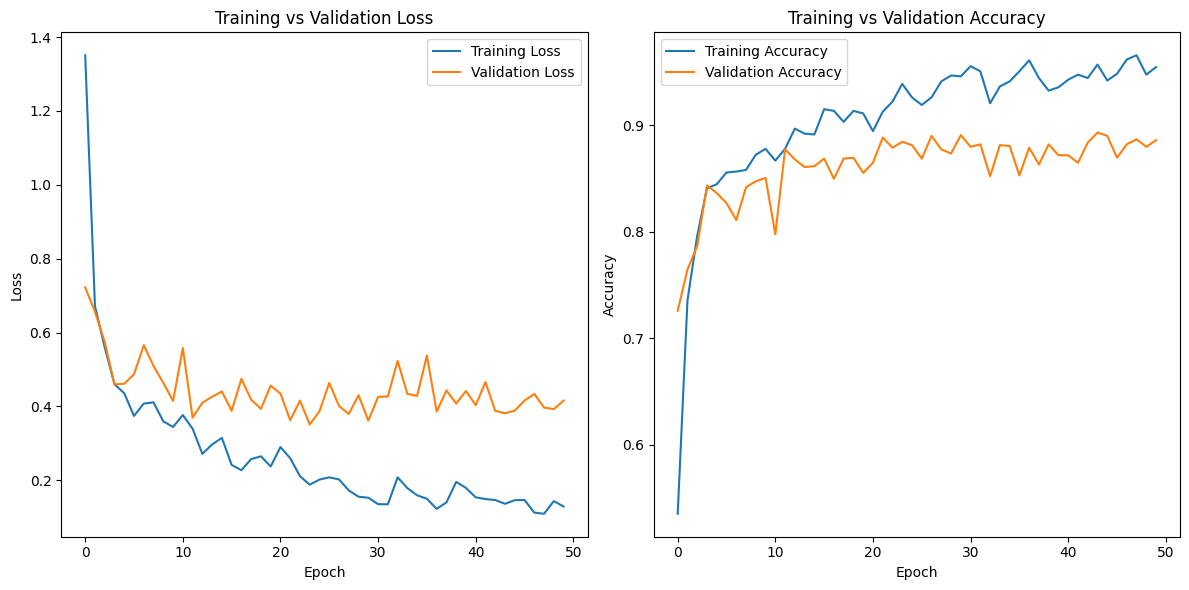

In [ ]:

# Plot training vs validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_inception.history['loss'], label='Training Loss')
plt.plot(history_inception.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Plot training vs validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_inception.history['accuracy'], label='Training Accuracy')
plt.plot(history_inception.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing import image as keras_image

def predict_waste_category(image_path, model):
    # Load and preprocess the image
    img = Image.open(image_path)
    img = img.resize((384, 512))  # Resize the image to match the input shape of the model
    img_array = keras_image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict the category of waste
    prediction = model.predict(img_array)
    waste_categories = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
    predicted_category_index = np.argmax(prediction)
    predicted_category = waste_categories[predicted_category_index]

    # Get the probability associated with the predicted category
    probability = prediction[0][predicted_category_index]
    return predicted_category, probability

# Example usage
image_path = "glass.jpg"
predicted_category, probability = predict_waste_category(image_path, model_inception)
print("Predicted waste category:", predicted_category)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted waste category: glass


In [ ]:
!pip install tensorflowjs



In [ ]:
from tensorflow.keras.models import load_model

# Load the entire model
model_inception = load_model('/content/garbage_classification_model_inception.h5')


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/garbage_classification_model_inception.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)